# Gender & Age Detection
                                                                                    Authors:    -Aryaman
                                                                                                -Aditya Kejriwal

###                                            Meta Data
UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.

https://susanqq.github.io/UTKFace/

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
BASE_DIR = 'UTKFace/'

In [3]:
# Reading all the images present in Base_Dir
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
# Converting to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,UTKFace/100_0_0_20170112213500903.jpg.chip.jpg,100,0
1,UTKFace/100_0_0_20170112215240346.jpg.chip.jpg,100,0
2,UTKFace/100_1_0_20170110183726390.jpg.chip.jpg,100,1
3,UTKFace/100_1_0_20170112213001988.jpg.chip.jpg,100,1
4,UTKFace/100_1_0_20170112213303693.jpg.chip.jpg,100,1


In [5]:
# Mapping labels for gender
gender_dict = {0:'Male', 1:'Female'}

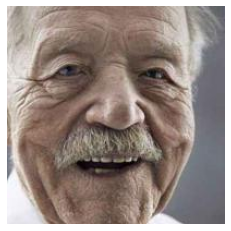

In [6]:
# Printing a single image
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<AxesSubplot:xlabel='age', ylabel='Density'>

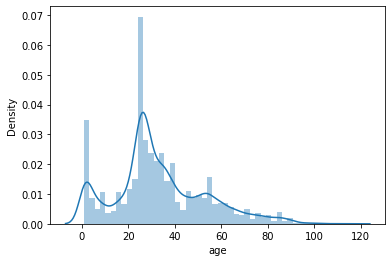

In [7]:
# Plotting the distribution of age
sns.distplot(df['age'])

<AxesSubplot:xlabel='gender', ylabel='count'>

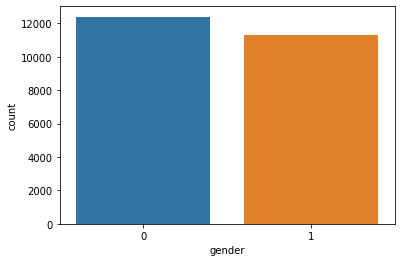

In [8]:
# Plotting Gender Distribution
sns.countplot(df['gender'])

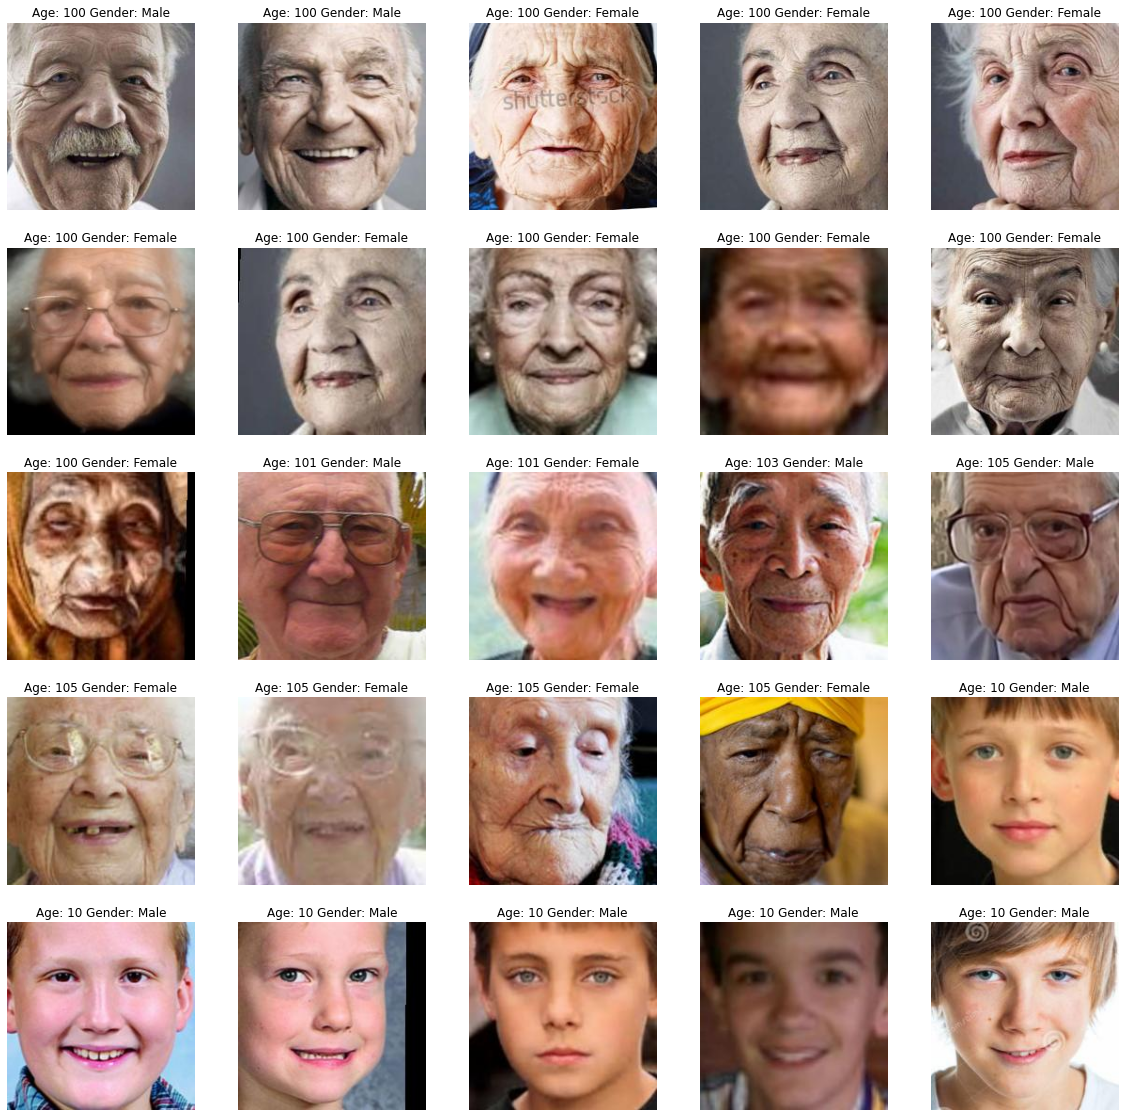

In [15]:
# Plotting multiple images
import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.preprocessing import image
image.ImageDataGenerator()
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = keras.utils.load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [18]:
# Extracting Features of images
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = keras.utils.load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [19]:

X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [20]:
# Noramlizing
X = X/255.0

#### Cropped Images


In [21]:
Crop_Dir = 'crop_part1'
# Reading all the images present in Cropped Directory
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(Crop_Dir)):
    image_path = os.path.join(Crop_Dir, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/9780 [00:00<?, ?it/s]

In [22]:
# Converting to dataframe
df2 = pd.DataFrame()
df2['image'], df2['age'], df2['gender'] = image_paths, age_labels, gender_labels
df2.head()

,image,age,gender
0,crop_part1\100_1_0_20170110183726390.jpg.chip.jpg,100,1
1,crop_part1\100_1_2_20170105174847679.jpg.chip.jpg,100,1
2,crop_part1\101_1_2_20170105174739309.jpg.chip.jpg,101,1
3,crop_part1\10_0_0_20161220222308131.jpg.chip.jpg,10,0
4,crop_part1\10_0_0_20170103200329407.jpg.chip.jpg,10,0


In [23]:
gender_dict = {0:'Male', 1:'Female'}

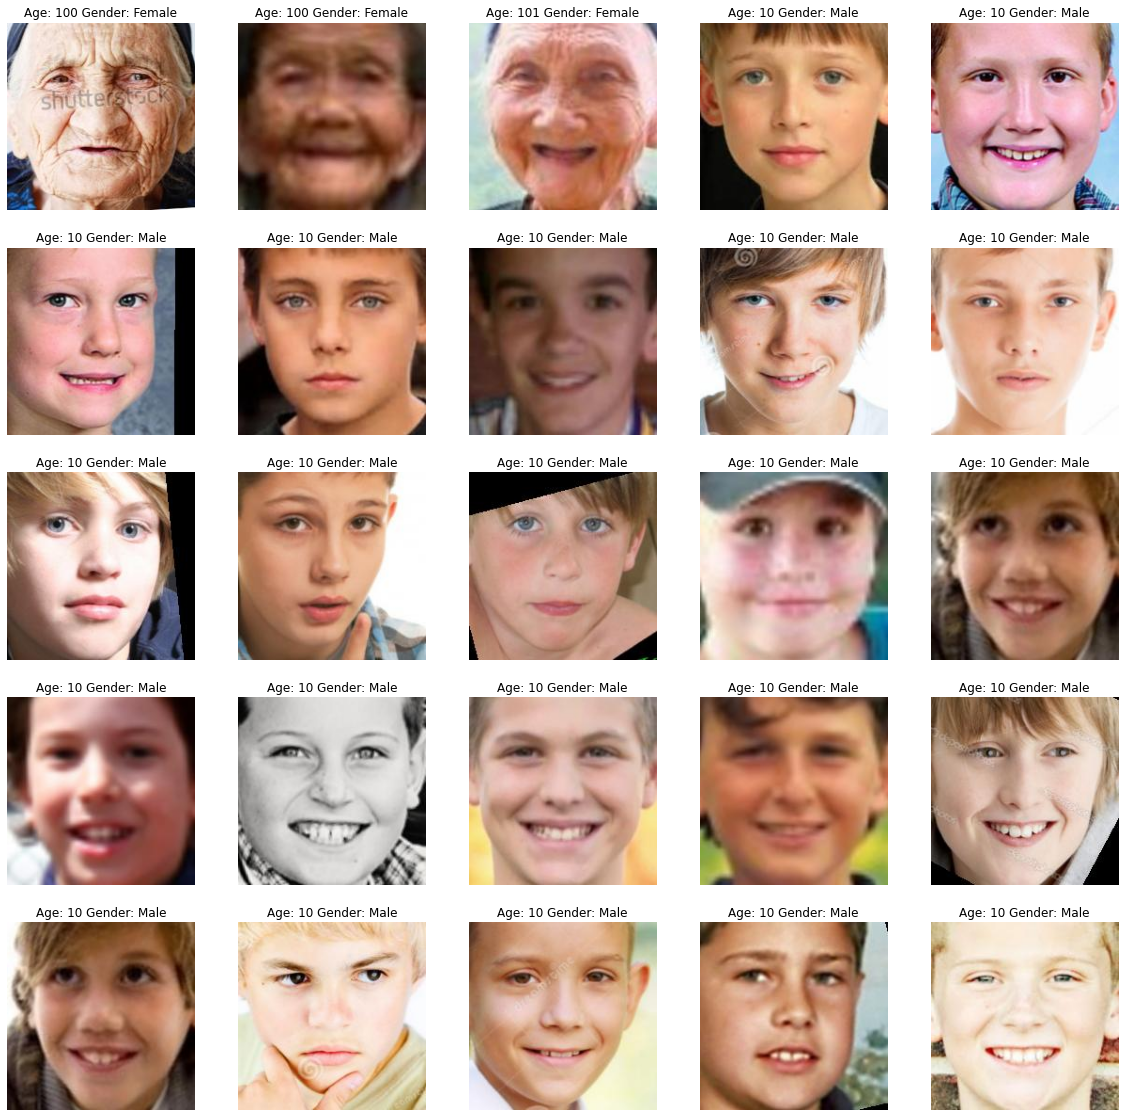

In [24]:
# Plotting multiple images
import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.preprocessing import image
image.ImageDataGenerator()
plt.figure(figsize=(20, 20))
files = df2.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = keras.utils.load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')